In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset


Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.24G/1.25G [00:18<00:00, 119MB/s] 
100% 1.25G/1.25G [00:18<00:00, 71.0MB/s]


In [4]:
!unzip -o plant-disease-recognition-dataset.zip -d plant-disease-recognition-dataset


Archive:  plant-disease-recognition-dataset.zip
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: plant-disease-recognition-dataset/Test/Test/Healthy/8e77857

In [ ]:
pip install tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 60.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.utils import img_to_array

import tensorflow as tf


In [ ]:
os.listdir('/content/plant-disease-recognition-dataset/Test/Test/Healthy')

['8fc3b16e36d0aac8.jpg',
 '8e858c8397706b7b.jpg',
 '8e97869f9e143863.jpg',
 '8ebc94969f1252d9.jpg',
 '8e79802b3fb770c8.jpg',
 '8f2071c7987e86ea.jpg',
 '8e7986d1ecd36445.jpg',
 '8f3360ce3227c79a.jpg',
 '8dfae9d78cc32089.jpg',
 '8fadf039a06cd8f0.jpg',
 '8e7e70a6878c1c79.jpg',
 '8f2f6ec09516f145.jpg',
 '8eda9490a3f38ea9.jpg',
 '8e8835d2ebdbc503.jpg',
 '8f3b45ca0c71673c.jpg',
 '8e68163c62dc57d5.jpg',
 '8eb3b68893378387.jpg',
 '8df452e2e38c0b6e.jpg',
 '8ed56dd8b2c1c15a.jpg',
 '8eb0da4b65b0638f.jpg',
 '8e8470687be37378.jpg',
 '8ddaac1bd6c8cd0a.jpg',
 '8f90e6bbd782c911.jpg',
 '8fd88738e26f45c4.jpg',
 '8eaeaea542a5217b.jpg',
 '8e82b1a51bd11afe.jpg',
 '8f83c2ee646433e3.jpg',
 '8f302a9511b7e74e.jpg',
 '8ed6fe1f030281d7.jpg',
 '8f2acfec7cc230c1.jpg',
 '8f85b8d78b58a06e.jpg',
 '8ddaa5a5caa5caa8.jpg',
 '8f512dd7711c8aa9.jpg',
 '8f456733d83cc836.jpg',
 '8f850aea4adfda82.jpg',
 '8fb63ed66891b0d0.jpg',
 '8f236f8637419e29.jpg',
 '8faa21bead40b563.jpg',
 '8def4d91382175c3.jpg',
 '8def3f60308ab41b.jpg',


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant-disease-recognition-dataset/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1322 files belonging to 1 classes.


In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('/content/plant-disease-recognition-dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/plant-disease-recognition-dataset/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 [==============================] - 217s 5s/step - loss: 0.2771 - accuracy: 0.9009 - val_loss: 0.4006 - val_accuracy: 0.8500
Epoch 2/5
42/42 [==============================] - 201s 5s/step - loss: 0.2131 - accuracy: 0.9236 - val_loss: 0.4472 - val_accuracy: 0.8333
Epoch 3/5
42/42 [==============================] - 202s 5s/step - loss: 0.1970 - accuracy: 0.9357 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 4/5
42/42 [==============================] - 194s 5s/step - loss: 0.1513 - accuracy: 0.9501 - val_loss: 0.4103 - val_accuracy: 0.8667
Epoch 5/5
42/42 [==============================] - 211s 5s/step - loss: 0.2266 - accuracy: 0.9183 - val_loss: 0.4464 - val_accuracy: 0.8667


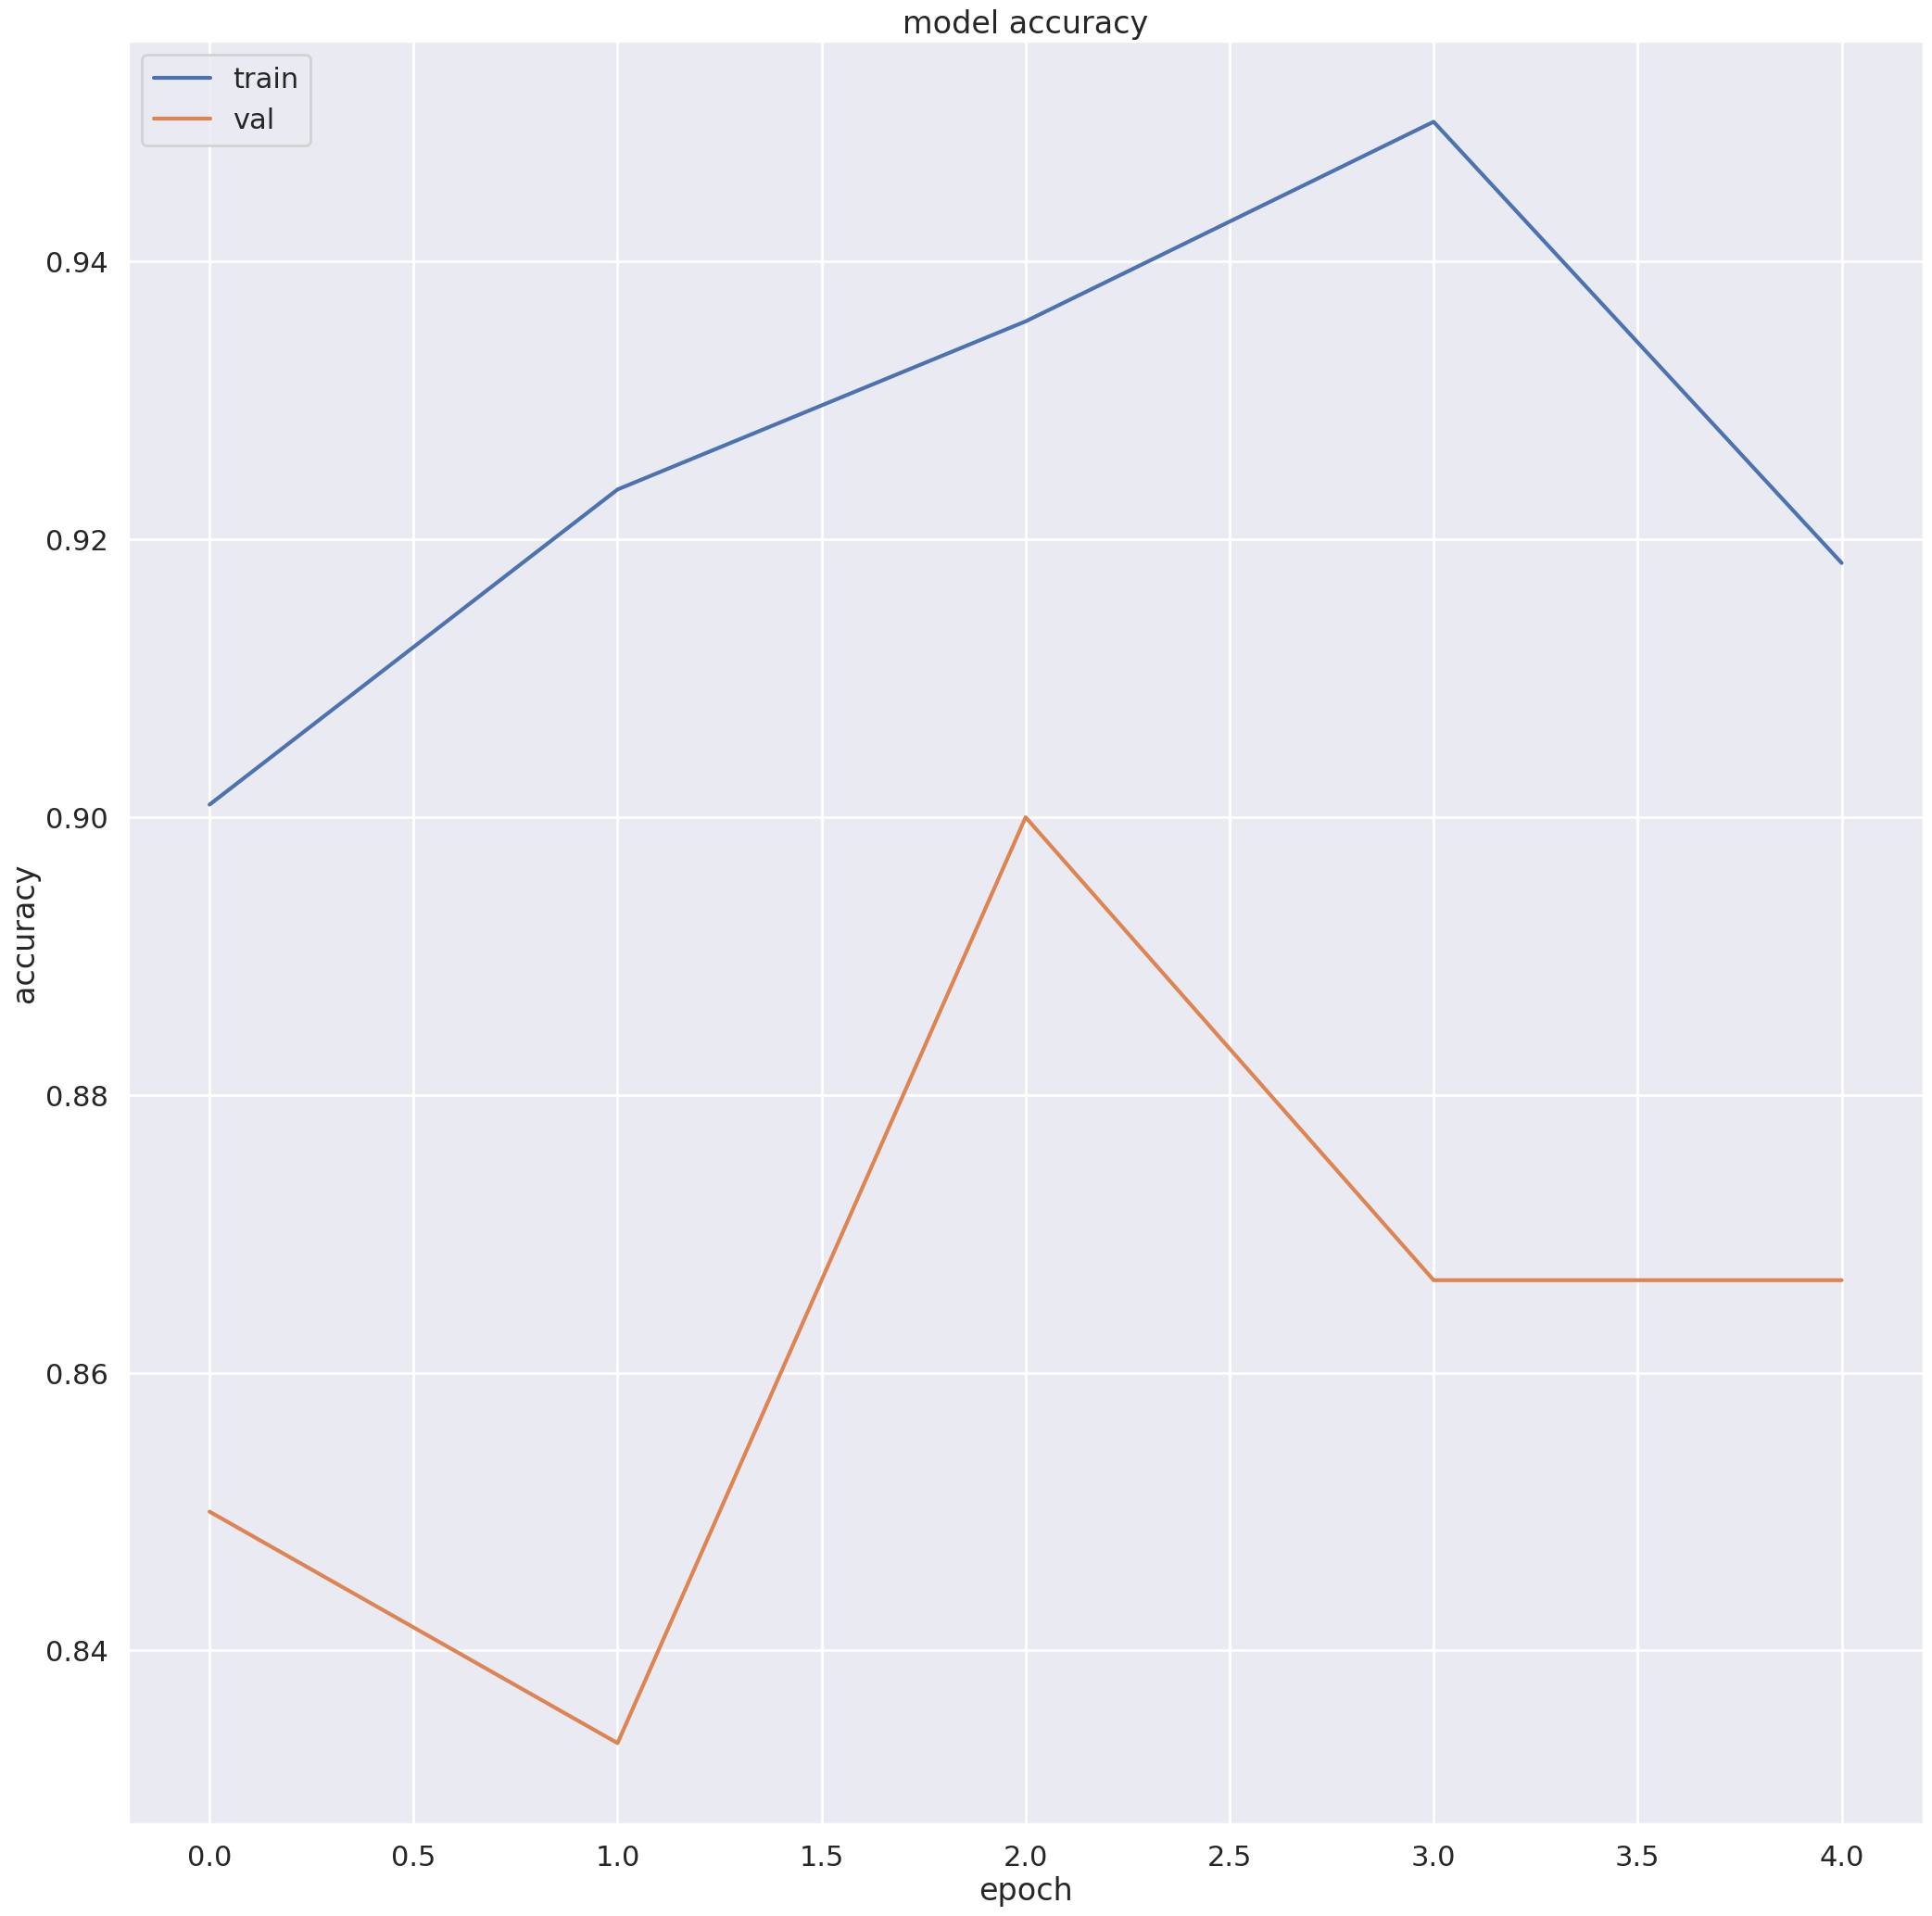

In [13]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.save("my_model.keras")

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/plant-disease-recognition-dataset/Validation/Validation/Powdery/9c1e3a3aa68c7971.jpg')

predictions = model.predict(x)
predictions[0]



1/1 [==============================] - 0s 57ms/step


array([0.01364216, 0.64950776, 0.33685014], dtype=float32)

In [16]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [17]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery
